In [65]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_friedman1

# Exercici de Regressió


## Generació de les dades
Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent formula:

`y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).`

Com podeu observar tenium 5 variables útils i les altrs que són independents de `y`. 

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

In [66]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)

X = torch.from_numpy(X)
y = torch.from_numpy(y)
X = X.float()
y = y.float()
# Separar en conjunt d'entrenament i test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Definició de la xarxa

- Heu de definir la xarxa amb la que voleu treballar, provau amb diferents arquitectures.

- Heu de definir la funció de pèrdua, podeu emprar MSE.

In [67]:
model = torch.nn.Sequential(torch.nn.Linear(10, 5), torch.nn.Linear(5, 5), torch.nn.Linear(5, 1), torch.nn.Flatten(0, 1))
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate =  1e-6

## Entrenament# 

Definir el bucle d'entrenament:
  - Predicció.
  - Càlcul de la funció de pèrdua.
  - Càlcul del descens del gradient.

Volem veure un gràfic on es mostri el valor de la funció de pèrdua pel conjunt d'entrenament i del conjunt de test a cada iteració.


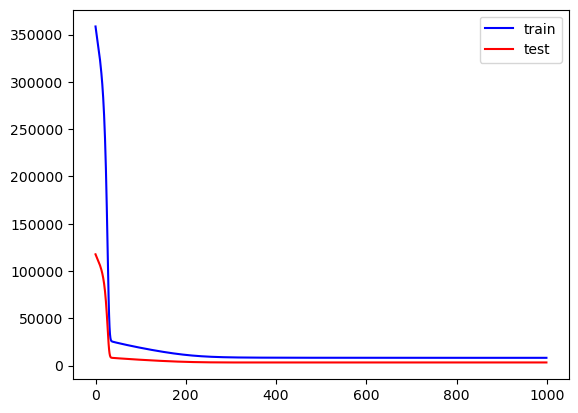

In [68]:
# TODO fer l'entrenament
iter = 1000
loss_p = np.zeros((iter))
loss_t = np.zeros((iter))

for t in range(iter):
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    loss_p[t] = loss.item()
    model.zero_grad()
    loss.backward()

    y_pred = model(X_test)
    loss = loss_fn(y_pred, y_test)
    loss_t[t] = loss.item()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
plt.plot(loss_p, color='blue', label='train')
plt.plot(loss_t, color='red', label='test')
plt.legend()

## Resultats



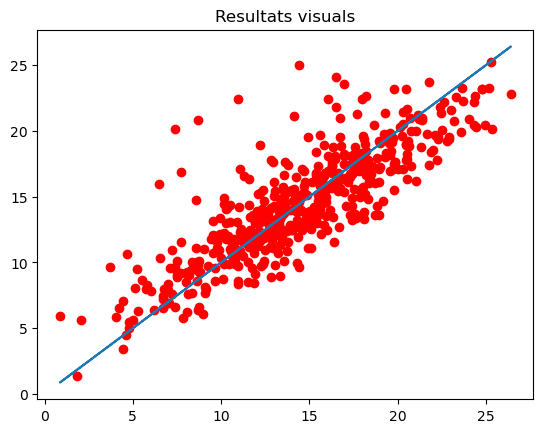

In [69]:
y_pred = model(X_test)

plt.title("Resultats visuals")
plt.scatter(y_test, y_pred.detach().numpy(), c="red")
plt.plot(y_test, y_test)
plt.show()